# 왜 심부전증 데이터를 골랐는가? 에 대하여 

국비 지원으로 빅데이터 분석을 배우며 마지막에 딥러닝에 대해 배웠다.
이때 이미지를 통해 폐질환 등을 분류해는 모델링에 대한 사례를 배웠는데 이때 생긴 궁금증이 있었다.

"이미지로 분류하는 것이 아니라, 의료관련 다양한 지표 데이터들을 활용해 머신러닝으로 질병을 예측/분류 할수는 없는 걸까?"

때마침 kaggle에서 심부전증환자를 예측하는데 활용할 수 있는 데이터를 발견해서 이를 통해 확인 해보고자 한다.

# 주제 : 예측모델로 심부전증 여부 예측하기
----------


## 데이터 소개
**Kaggle의 Heart Failure Prediction 데이터셋을 사용**

---
**컬럼설명**

범주형 데이터

anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)

diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)

high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)

sex: 성별 (0: 여성, 1: 남성)

smoking: 흡연 여부 (0: 비흡연, 1: 흡연)

DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

---

수치형 데이터 

age: 환자의 나이

심부전 유병률은 60세 이상에서 급증하며 나이가 들수록 증가하는 것으로 알려졌다.


time: 관찰 기간 (일)

**creatinine_phosphokinase: 크레아틴키나제 검사 결과**
1) CK (크레아틴키나제)는 심장, 뇌, 골격근, 및 다른 조직에서 발견되는 효소

2) CK(크레아틴키나제) 농도는 근육 또는 심장 세포가 손상될 때에 올라간다.

**ejection_fraction: 박출계수 (%)**
1) 맥박을 통해 심장에서 박출 되거나 펌프하는 혈액의 %량

2) 범주는 0-100%

3) 의학적으로 박출계수가 50% 또는 더 높다면, 정상 %로 고려(치료 필요 없음)

4) 박출계수가 50%보다 낮다면, 심장은 대부분 충분한 산소가 없다거나, 관상동맥으로 흐르는 혈액이 부족하다는 의미


**platelets: 혈소판 수 (kiloplatelets/mL)**

1) 성인의 경우 혈액 1마이크로 리터 안에 약 15~40만 개의 혈소판을 보유하고 있다.

2)  혈소판의 수나 기능에 이상이 생기면 지혈 작용에 영향을 주어 출혈이 생길 수 있다.


**serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)**
1) 크레아티닌은 근육에서 생성되는 노폐물 - 신장기능 평가의 주요 지표

2) 혈중 크레아티닌 농도의 정상범위는 0.50~1.4 mg/dL



**serum_sodium: 혈중 나트륨 레벨 (mEq/L)**
1) 고나트륨혈증은 보통 혈중농도가 145mEq/L 이상인 경우를 말함

2) 고나트륨혈증 발생기 심혈관계 이상 발생할 수 있음


---

- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

# Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집 관련 정책의 변화

한국의 경우 한정

2020.1월 데이터 3법 개정 이후 -> '가명정보' 사용이 가능해짐

개인 식별이 가능한 정보를 비식별화( de-identification)을 하여 일반적으로 사용가능한 데이터로 변화시킨 것

### 의료 데이터 분석의 현재

해외 (덴마크, 일본, 영국, 미국 등) 의 경우 과거부터 의료데이터 분석을 시행해옴.

단순하게는 병원 공실률 개선을 위한 분석 부터 넓게는 질병발생 가능성 예측 까지 넓은 범주에서 의료 관련 데이터 분석을 시행

하지만, 한국의 경우 데이터 3법 개정 이후부터 의료 관련 데이터 분석이 활발해지고 있는 상황.

### Accuracy, Precision, 그리고 Recall 이 주요 판단 지표

Accuracy : 예측결과(pred)와 실제 값(label)이 같은 개수 / 전체 데이터


Precision(정밀도) : TP라고 예측했을때 실제로 TP일 확률 => [ TP/ (FP+TP) ] (FP 를 낮추는데 초점)


Recall (재현율) : 실제값이 Positive인 데이터 중에서 예측결과(Pred)와 실제 값(label)이 일치한 데이터의 비율 => [TP / (FN+TP) ] (FN을 낮추는데 초점)

---
의료 데이터 분석에서는 **Recall**이 가장 중요한 지표. 

**Why?**

**Recall이 중요한 지표인 경우 : 실제로 Positive한 것을 Negative로 '잘못' 판단했을때 그 영향력이 심각한 경우

의료 데이터의 경우가 대표적인 예시

실제 질병을 질병이 없다고 예측할 경우 그 잘못된 판단으로 **환자의 생명** 을 잃게 될 수 도 있기 때문.

---

그래서 실제 의료 분석은 여러단계를 거치면서 분석한다.

1) 비교적 간단하지만 정확성은 떨어지는 테스트 

2) 1)보다는 좀 더 복잡하지만 정확성은 좀 더 높은 테스트

3) 2)보다는 좀 더 복잡하지만 정확성은 좀 더 높은 테스트

와 같이 조금씩 더 복잡하면서 정확성이 더 높은 테스트를 순차적으로 시행


e.g) MRI -> 혈액 검사 -> 조직검사

---
일반적으로 의료분석은 상대적으로 쉽게 얻을 수 있는 데이터들을 조합해서 차근 차근 분석 정확도를 높여가기 때문에 
초반에는 Recall 이 높은 분석방법이 더 중요하다. 차후에 최종적으로는 Precision 과 Recall이 모두 높은 방법을 사용하는 것.

---
Recall을 100%로 만드는 것을 추구하면 Precision은 0에 가까워 진다.


e.g) 무한대의 환자가 있다고 가정
Recall을 100%로 만들려면 무한대의 모든 환자에게 병이 있다. (True) 라고 진단하면 된다.
하지만 이 경우 Precision 을 측정하면 분모값이 환자수(무한대) 이기 때문에 0쪽으로 하락한다.

그러므로, Recall은 95%이상을 추구하면서 Precision을 떨어지지 않도록 하는 것이 중요하다.

# Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 컬럼 전체 확인 가능하도록 출력 범위 설정
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# 불필요한 경고 표시 생략
import warnings
warnings.filterwarnings(action = 'ignore')

##  Kaggle API 로 데이터 불러오기 및 셋팅


In [2]:
# 다운로드 패키지
import opendatasets as od

# os 명령 관련 패키지
import os


#username = gabesoon


#user key = f7dab1c856bc634fde741afaf75781ea

od.download("https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset")

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'heart-attack-analysis-prediction-dataset',
 'heart_failure_clinical_records_dataset.csv',
 '[분류] 데이터 분석으로 심부전증을 예측하기 (Kaggle 데이터).ipynb']

## Pandas 라이브러리로 csv파일 읽어들이기


In [4]:
# 데이터 로드
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
# 데이터 확인
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- 총 299명의 환자 데이터
- Columns 는 13개
- NaN값 있는 columns 없음
______

**범주형 데이터 : count 확인**

- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

**수치형 데이터 : 전반적인 통계량 확인**

- age: 환자의 나이
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- ejection_fraction: 박출계수 (%)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- time: 관찰 기간 (일)

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


1) 환자의 나이 분포는 40~95세 사이이고, 평균 연령은 60.83이다.

2) (0,1) 로된 범주형 데이터의 평균값을 보면 대부분 0.35~0.64 범주안에 있다 = 특별하게 불균형한 데이터는 없는 것으로 보인다.

(대부분의 데이터가 6:4 정도의 비율) - 용인 가능한 수준 

단, 사망자 데이터는 0.32로 1/3이 생존이라 다소 불균형이다.

3) creatinine_phosphokinase 의 경우 min값은 23, 50%값은 250, 75%값은 582인데, max값은 7861로 이상치일 것으로 보인다. (제외 해야할 수도 있다.)

# Step 2. EDA 및 데이터 기초 통계 분석


## 수치형 데이터별 Histogram - 데이터 빈도 with DEATH_EVENT

### 연령대별 사망수 분포

<AxesSubplot:xlabel='age', ylabel='Count'>

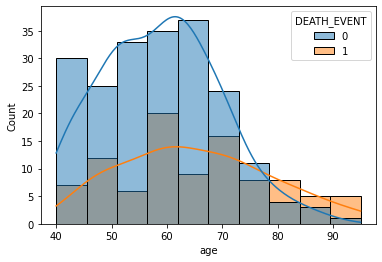

In [7]:
# seaborn의 histplot, jointplot, pairplot을 이용
# kde = 히스토그램 분포를 곡선으로 표현
# gray = 1 이지만 0과 겹친 데이터

sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

- age 데이터는 longtail 형태의 데이터(앞쪽 데이터의 빈도가 높고 뒤로 갈수록 빈도가 낮아지는 형태)

### 크레아틴키나제 검사 결과 (3000이하인 것만) 

creatinine_phosphokinase: 크레아틴키나제 검사 결과

1) CK (크레아틴키나제)는 심장, 뇌, 골격근, 및 다른 조직에서 발견되는 효소

2) CK(크레아틴키나제) 농도는 근육 또는 심장 세포가 손상될 때에 올라간다.

---

- creatinine_phosphokinase 는 describe()로 보았을때 **outlier가 존재하는** 데이터였다.
- 실제로 값이 3000 이상인 경우 데이터의 count가 낮아서 전체 데이터를 시각화할 경우 데이터를 크게 보기가 어려웠다.
- 빈도수가 많은 데이터를 살피기 위해 값이 **3000이하 인 데이터**들만 추려서 시각화 하였다.

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

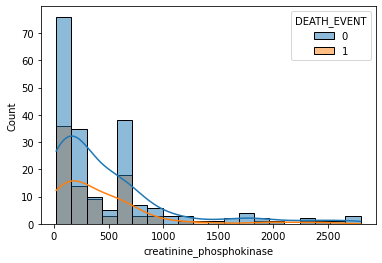

In [8]:
a = df.loc[df['creatinine_phosphokinase'] < 3000]

sns.histplot(x= 'creatinine_phosphokinase', data=a, hue='DEATH_EVENT', kde=True)

### ejection_fraction: 박출계수 (%) - 히스토그램

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

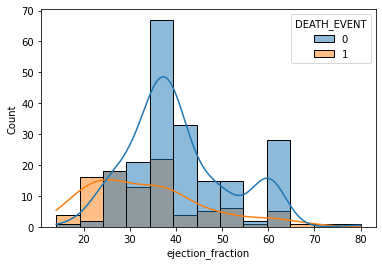

In [9]:
# bins 조절로 빈자리가 없도록 조절
sns.histplot(x='ejection_fraction', data=df, bins=13, hue='DEATH_EVENT', kde=True)

ejection_fraction: 박출계수 (%)

1) 맥박을 통해 심장에서 박출 되거나 펌프하는 혈액의 %량

2) 범주는 0-100%

3) 의학적으로 박출계수가 50% 또는 더 높다면, 정상 %로 고려(치료 필요 없음)

4) 박출계수가 50%보다 낮다면, 심장은 대부분 충분한 산소가 없다거나, 관상동맥으로 흐르는 혈액이 부족하다는 의미

---

- 전반적으로 ejection_fraction이 낮은 사람의 사망수가 높고, 높은 사람은 사망수가 낮은 경향을 보인다.(도메인 지식과 동일)

- 사망자수와 반비례 형태의 관계를 보이고, 각 빈도 별로 사망자수의 비율에 차이는 있지만 사망수는 전반적으로 높게 분포되어 있어 사망 여부 판별에 중요한 데이터로 사용할 수 있을 것으로 예상된다.

- 특히 Precision을 높이기 위한 데이터로는 유용할 것이다.(사망한 경우자체가 많음-> TP증가 -> FP 낮아짐 -> Precision 낮아짐)

- 다만 Recall을 높이는데는 크게 유용한 데이터는 아닐 것이다.


### 관찰일수(time) - 히스토그램

<AxesSubplot:xlabel='time', ylabel='Count'>

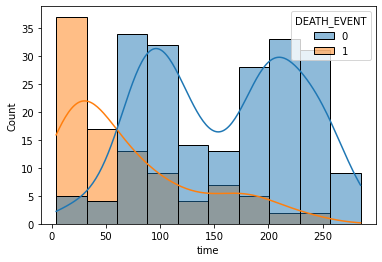

In [10]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

- 관찰기간(time)에 대한 데이터가 초반에 많이 몰려있고, 관찰기간이 긴 데이터일 수록 분포가 떨어진다. (Gamma distribution)
- 생존데이터의 경우 '쌍봉 형태' 이다. 생존자에 대한 대부분의 데이터가 2곳에 집약되어 있는 것.

- 사망자가 발생하면 관찰기간(time)의 값이 더 높아질수가 없는 구조이다.
- 그러므로 **time 데이터는 제외하고 학습을 진행하는 것**이 바람직 하다.

### ejection_fraction: 박출계수 (%) - Boxplot

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

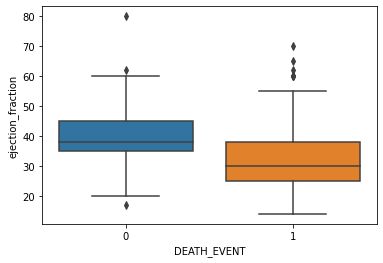

In [11]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용

# ejection_fraction: 박출계수 (%)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

[도메인 지식]
- ejection_fraction이 50%보다 낮다면, 심장은 대부분 충분한 산소가 없다거나, 관상동맥으로 흐르는 혈액이 부족하다는 의미이다.
---
[Boxplot 분석]
- 생존자의 ejection_fraction 평균은 약 40이다.
- 사망자의 ejection_fraction 평균은 약 30 이다.
---

- ejection_fraction은 도메인 지식 만큼은 아니겠지만, 사망자와 생존자간의 평균 차이가 상당하므로 사망자수 와의 상관성이 있는 주요 지표일 것으로 예상된다.

### 혈소판 수 (kiloplatelets/mL)

<AxesSubplot:xlabel='platelets', ylabel='Count'>

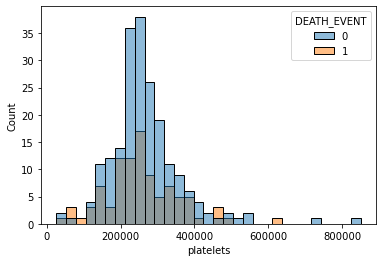

In [12]:
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')

platelets: 혈소판 수 (kiloplatelets/mL)

1) 성인의 경우 혈액 1마이크로 리터 안에 약 15~40만 개의 혈소판을 보유하고 있다.

2) 혈소판의 수나 기능에 이상이 생기면 지혈 작용에 영향을 주어 출혈이 생길 수 있다.

- 혈소판 수의 데이터와 사망자수 간의 연관성이 보이지 않는다.

### 관찰 기간 (일)

<AxesSubplot:xlabel='time', ylabel='Count'>

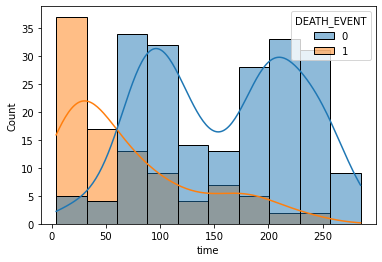

In [13]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

- 전반적으로 볼때, 관찰 기간이 짧을때 사망자수가 많지만 관찰 기간이 길어질 수록 사망자수가 적어지는 경향이 있다.
- 다만, 관찰 기간이 중간치일때는 사망자수의 분포가 균일하다.
- 그러므로 관찰 기간이 사망자수를 예측하는데 결정적인 지표라고 하기는 어렵다.

## 수치형 데이터별 Jointplot 

### [혈소판 수 (kiloplatelets/mL) x 크레아틴키나제 검사 결과] X 사망자 수 

creatinine_phosphokinase: 크레아틴키나제 검사 결과

1) CK (크레아틴키나제)는 심장, 뇌, 골격근, 및 다른 조직에서 발견되는 효소

2) CK(크레아틴키나제) 농도는 근육 또는 심장 세포가 손상될 때에 올라간다.

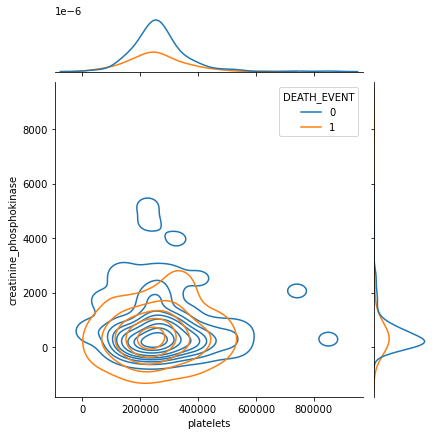

In [14]:
#sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.4)
sns.jointplot(x='platelets', y='creatinine_phosphokinase',data=df, kind='kde', hue='DEATH_EVENT')

### [박출계수 (%) x 혈중 나트륨 레벨 (mEq/L)] X 사망자 수 

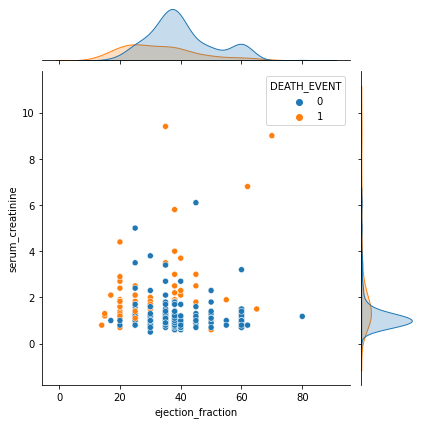

In [15]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

## 범주형 데이터별 Boxplot

### 흡연자여부 별 박출계수

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

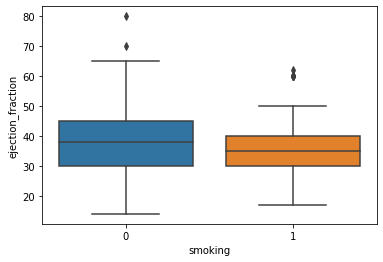

In [16]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

[도메인 지식]
- ejection_fraction이 50%보다 낮다면, 심장은 대부분 충분한 산소가 없다거나, 관상동맥으로 흐르는 혈액이 부족하다는 의미이다.
---

[Boxplot 분석]
- 흡연자와 비흡연자간 데이터의 평균은 큰 차이가 없다.
- 흡연자의 경우 ejection_fraction 값의 범위가 좁다. 
- 흡연자의 ejection_fraction 최고치가 더 낮다. 
- 흡연자의 ejection_fraction 평균은 30 중반이다.
- 비흡연자의 ejection_fraction 평균은 30 후반이다.
---

- 흡연자의 ejection_fraction 평균은 정상치 아래이므로 심장에 문제가 있을 가능성이 있다고 예상할 수 있다.
- 즉, 흡연여부는 심부전증에 간접적으로 유의미한 데이터일 가능성이 높다.
- 다만 이 데이터에서는 비흡연자의 ejection_fraction도 평균이 40 아래이므로 도메인 지식만큼 심부전 발생여부와 강력한 연관성을 보이지 않을 가능성이 크다.

### 흡연여부 별 사망자수 x 혈소판 수 (kiloplatelets/mL)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

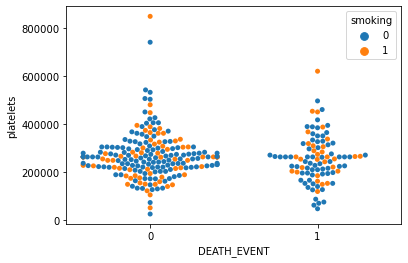

In [17]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

# Step 3. 데이터 전처리


## 데이터 표준화


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# 형태별 데이터 분류를 위해 columns 확인 - 복사해서 사용
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT'], dtype='object')

In [20]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기

#범주형
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]

#수치형
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]

#출력 (label)
y = df['DEATH_EVENT']

In [21]:
# 수치형 입력 데이터를 표준화 & 입력 데이터 통합
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)

# 결과 통합
X = pd.concat([X_scaled, X_cat], axis=1)

In [22]:
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


## Train / Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# 학습 / 테스트용 데이터 분리 (7:3)
# 시간 순서 상관이 없으므로 shuffle=True 기본으로 사용

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# Step 4. Classification 모델 학습


## Logistic Regression 으로 기본적인 분류 분석 진행

### Logistic Regression 모델 생성 & 학습


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# 모델 생성
# max_iter : Gradient Descent 수행 횟수
model_lr = LogisticRegression(max_iter=1000)

# 모델 학습
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### 모델 결과 평가1


In [27]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.2f}, 정밀도: {1:.2f}, 재현율: {2:.2f}'.format(accuracy , precision ,recall))

In [28]:
from sklearn.metrics import classification_report

In [29]:
# 예측값 pred에 할당
pred = model_lr.predict(X_test)

# 결과 출력
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



In [30]:
get_eval(y_test,pred)

오차 행렬
[[59  5]
 [17  9]]
정확도: 0.76, 정밀도: 0.64, 재현율: 0.35


## Step5. 앙상블로 머신러닐 결과 향상 시키기


### XGBoost 모델 생성&학습

In [31]:
from xgboost import XGBClassifier

In [32]:
# 모델 생성
model_xgb = XGBClassifier()

# 모델 학습
model_xgb.fit(X_train, y_train)

[14:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=6, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 모델 학습 결과 평가2

In [33]:
# 예측
pred = model_xgb.predict(X_test)

# 결과 출력
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



- Precision과 Recall은 정확도를 측정하는 관점이 서로 다르다.
- 때문에 어느 하나가 높다고 무조건 좋은 결과라 할 수 없다.
- 이 둘을 모두 고려한 값이 f1-score 이다. (Precision & Recall의 조화평균)

In [34]:
get_eval(y_test,pred)

오차 행렬
[[56  8]
 [13 13]]
정확도: 0.77, 정밀도: 0.62, 재현율: 0.50


# Step 6. 분석결과에서 Insight 찾기

##  Feature importance 확인하기


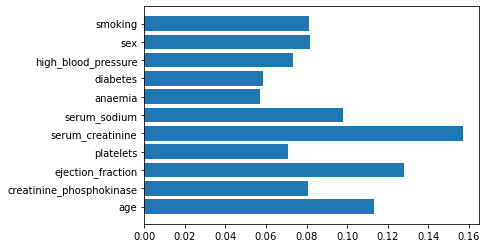

In [35]:
plt.barh(X.columns, model_xgb.feature_importances_) # 가로 출력 (barh)

plt.show()

- serum_creatinine이 가장 중요한 요소이다.
- ejection_fraction 이 두번째로 중요한 요소이다.
- age가 세번째로 중요한 요소이다.

즉 심부전증 예측을 위해 위의 3 요소를 중점적으로 살펴 보는 것이 중요하다.

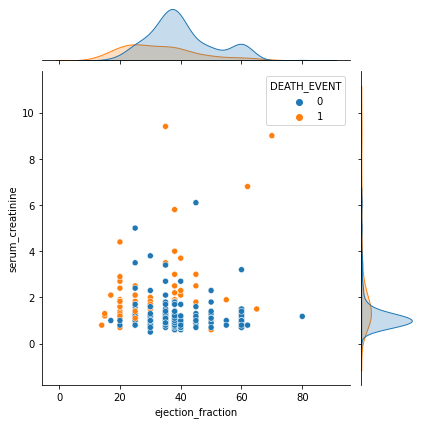

In [36]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')

- 주요 변수로 판별된 2개의 feature에서 발생한 DEATH_EVENT가 서로 구분이 잘 된다. 
- 이 데이터들을 기반으로 심부전증 여부를 판별하게 된다면 분류를 잘 할 수 있을 것으로 예상 된다.

## Step6 두개의 모델 학습 결과 심화 분석


### Precision-Recall 커브 확인 - 주로 불균형한 데이터르 평가할때 사용

In [37]:
from sklearn.metrics import plot_precision_recall_curve

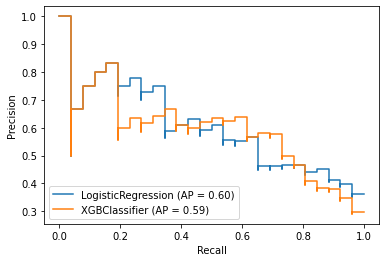

In [38]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기
fig = plt.figure() #기본 figure 생성

ax = fig.gca() #여러개의 x를 사용해 하나의 캔버스에 그리기 위해 사용

plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

- 2개의 그래프를 비교하였을때 위쪽에 위치한 것이 더 정확도가 높은 모델이란 뜻이다.
- 전반적으로 XGBClassifier이 더 높은 성능을 보여주고 있다.

### ROC 커브 확인하기 - 주로 균형인 데이터를 평가할때 사용

In [39]:
from sklearn.metrics import plot_roc_curve

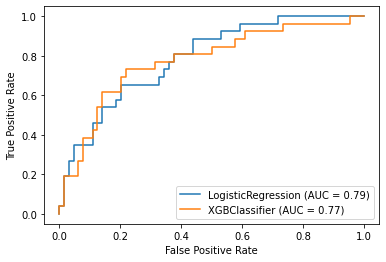

In [40]:
# 두 모델의 ROC 커브를 한번에 그리기
fig = plt.figure()
ax = fig.gca()
plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)

- TP(True Positive) rate가 낮을때 얼마나 빨리 1에 가까워 지는지로 평가
- AUC (Area Under Curve) : 그래프 아래의 영역의 넓이 값
- 전반적으로 LogisticRegression이 더 높은 성능을 보여주고 있다.
---

# 결론

- 주어진 데이터를 기반으로 보았을때 심부전증 예측에 중요한 요소는 serum_creatinine(혈중 크레아틴 레벨), ejection_fraction(박출계수), 그리고 age이다.

- 실제로 도메인 지식과 비교봤을때 크레아틴 레벨이나, 박출계수는 심부전을 측정하는데 중요한 지표이다.



- **그러므로 Classification을 적용한 데이터 분석으로 심부전증을 예측할 수 있음을 확인했다.**